# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_pickle('data.pkl')

# Distribution of categories in class label

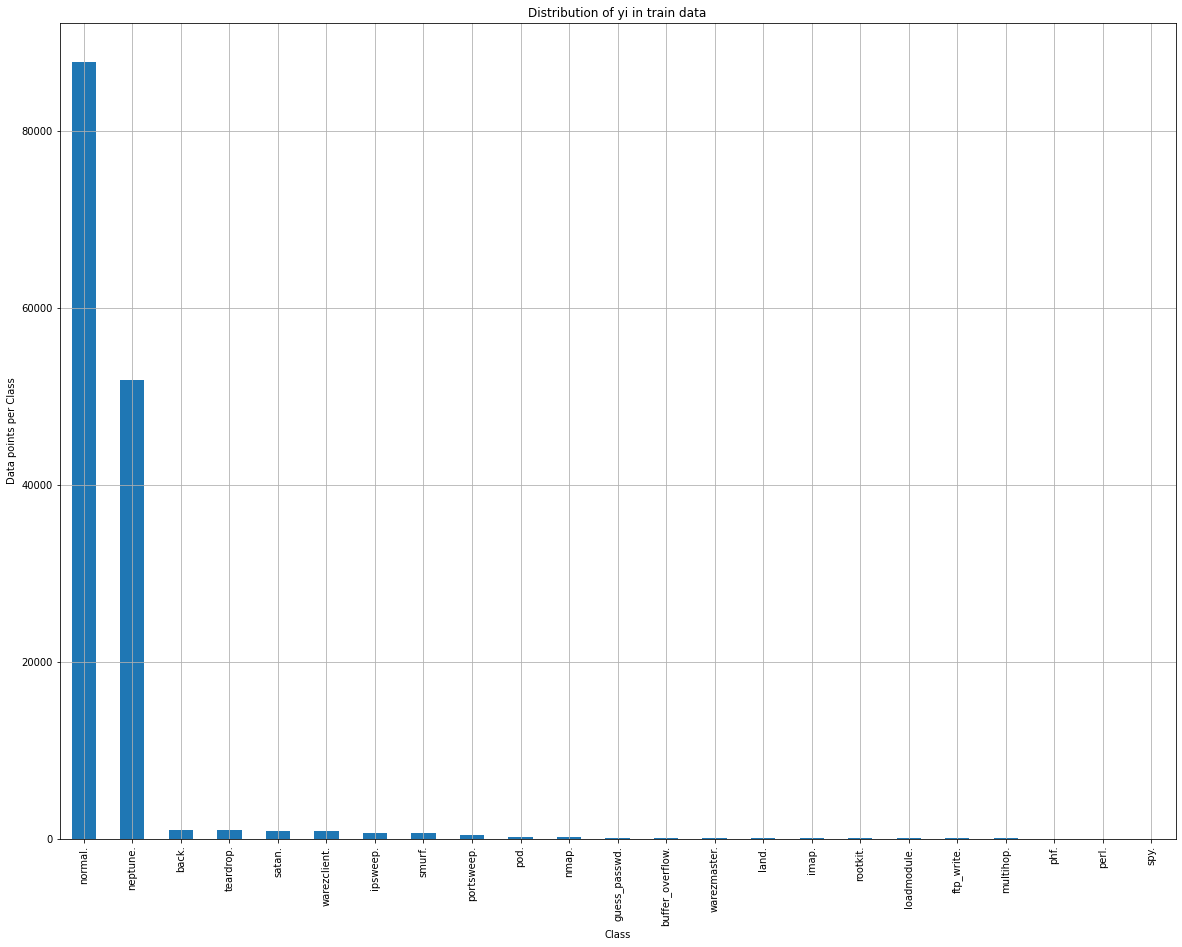

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

In [3]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')

    

* Most of the data points are from "normal" (good connections) category which is around 60.33 %.


* In the categories that belong to bad connections, "neptune." (35.594 %) and "back." (0.665 %) have the highest no. of data points.


* Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least no. of data points with less than 10 data points per class.


* The dataset is highly imbalanced, thus we will need to build a model which should be able to classify data points from these low distribution classes accurately.

# Performance Metrics

- As the dataset is highly imbalanced, we will need to build a model which should be able to classify the INTRUSION categories accurately.


- We will use the CONFUSION MATRIX as that will help us to determine how well the data points belonging to each of the 23 classes are classified.


- Along with the confusion matrix, we will also calculate precision, recall and weighted f1-score to determine the best model.


- Although not preferred for imbalanced datasets, but we will also display the accuracy score that will give us an estimate of the total no. of correctly classified points.


- Some important evaluation scores that can be added for this problem are the TPR (True Positive rate) and FPR (False Positive Rate) scores.

We want our FPR to be as low as possible. This is because, a "Normal" connection getting dropped beacuse of getting misclassified as a "Bad" connection is less severe compared to a "Bad" connection getting misclassified as a "Normal" connection, which may result in a security threat

# Univariate Analysis: Duration

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'normal.'),
  Text(1, 0, 'buffer_overflow.'),
  Text(2, 0, 'loadmodule.'),
  Text(3, 0, 'perl.'),
  Text(4, 0, 'neptune.'),
  Text(5, 0, 'smurf.'),
  Text(6, 0, 'guess_passwd.'),
  Text(7, 0, 'pod.'),
  Text(8, 0, 'teardrop.'),
  Text(9, 0, 'portsweep.'),
  Text(10, 0, 'ipsweep.'),
  Text(11, 0, 'land.'),
  Text(12, 0, 'ftp_write.'),
  Text(13, 0, 'back.'),
  Text(14, 0, 'imap.'),
  Text(15, 0, 'satan.'),
  Text(16, 0, 'phf.'),
  Text(17, 0, 'nmap.'),
  Text(18, 0, 'multihop.'),
  Text(19, 0, 'warezmaster.'),
  Text(20, 0, 'warezclient.'),
  Text(21, 0, 'spy.'),
  Text(22, 0, 'rootkit.')])

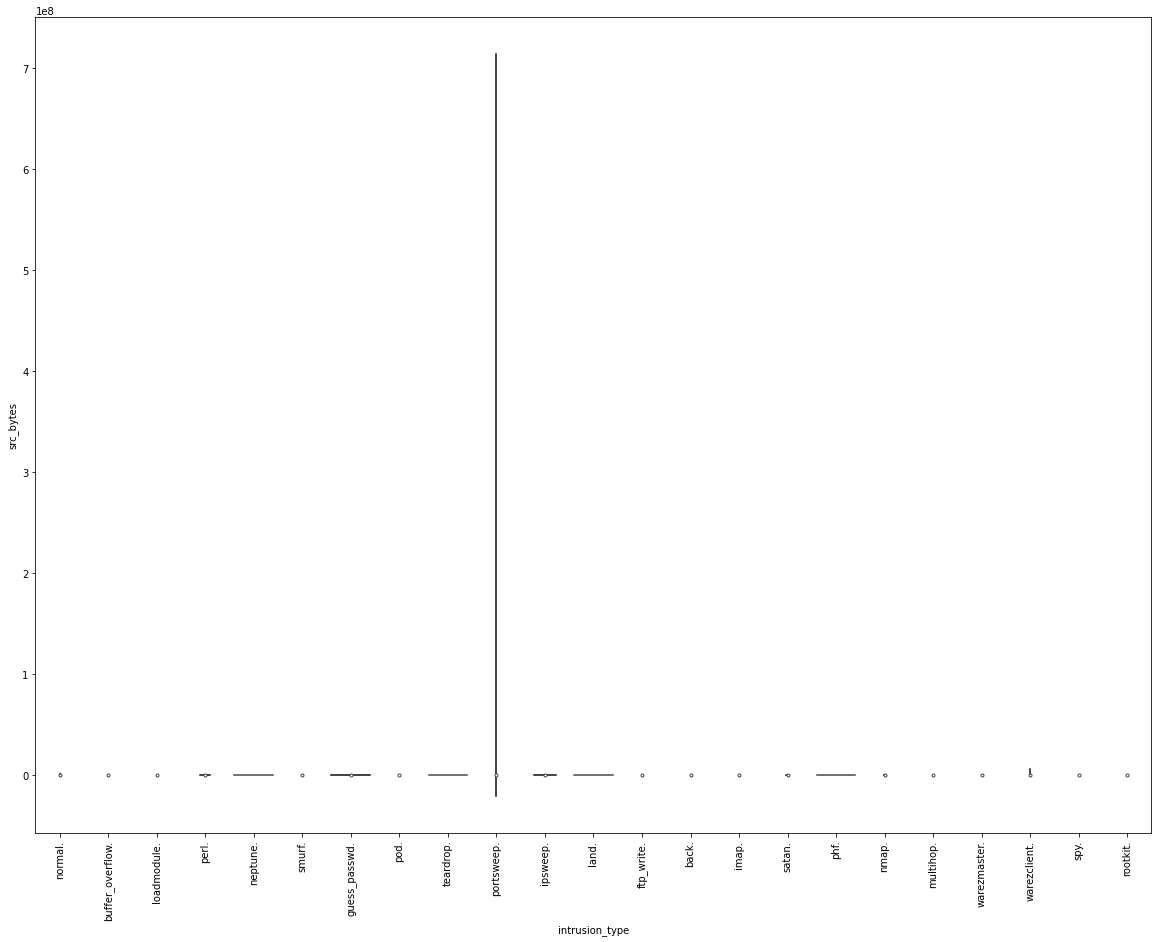

In [4]:
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="src_bytes", data=data)
plt.xticks(rotation=90)

* using src_bytes as a feature for analysis, the intrusion category "portsweep" is distinguishable from rest of the categories.


* relatively high no of classes, the Univariate analysis using boxplots and violin plots do not give us clear and satisfactory results.


* it would also be wise to use pairplots for BiVariate Analysis or go with PCA/TSNE to reduce the no. of dimensions and perform Bi/Tri-Variate Analysis